# Linear Regression

In [15]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import graphviz as gr
plt.style.use("fivethirtyeight")

In [2]:
np.random.seed(45)
N_SAMPLES = 5000

In [3]:
alpha = 1.12
beta = 0.93
epsilon = np.random.randn(N_SAMPLES)

In [4]:
X = np.random.randn(N_SAMPLES)
y = alpha + beta * X + 0.5 * epsilon

In [5]:
X = sm.add_constant(X)
print(X)

[[ 1.          0.11530002]
 [ 1.         -0.43617719]
 [ 1.         -0.54138887]
 ...
 [ 1.         -0.03732549]
 [ 1.         -0.23686068]
 [ 1.         -1.79838402]]


In [7]:
model = sm.OLS(y, X)
fitted_model = model.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                 1.681e+04
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:08:12   Log-Likelihood:                -3615.0
No. Observations:                5000   AIC:                             7234.
Df Residuals:                    4998   BIC:                             7247.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1243      0.007    159.391      0.0

Text(0, 0.5, 'y')

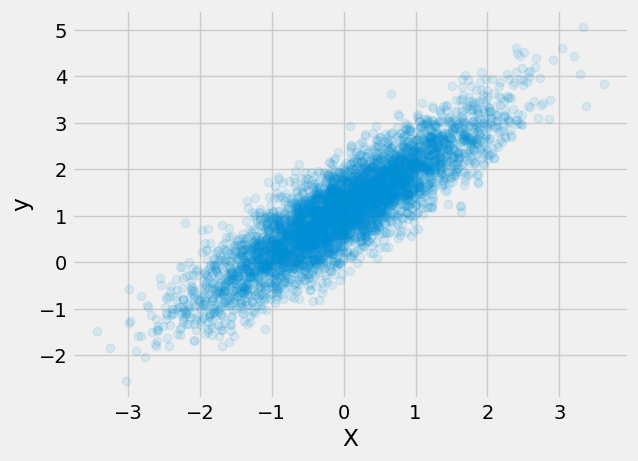

In [11]:
plt.plot(X[:, 1], y, "o", alpha=.1)
plt.xlabel("X")
plt.ylabel("y")

In [14]:
print(sm.OLS(X[:, 1], sm.add_constant(y)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                 1.681e+04
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:15:43   Log-Likelihood:                -3375.0
No. Observations:                5000   AIC:                             6754.
Df Residuals:                    4998   BIC:                             6767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9441      0.010    -96.048      0.0

# Should we always control for all available covariates?

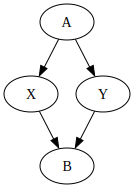

In [17]:
g = gr.Digraph()

g.edge("A", "X")
g.edge("A", "Y")
g.edge("X", "B")
g.edge("Y", "B")

g

Modelo f(A, X, Y) é o mais adequado:
- A é confounder entre X e Y
- X, Y, B: collider

1. Definir SCM

In [20]:
a = np.random.randn(N_SAMPLES)
x = 2 * a + .5 * np.random.randn(N_SAMPLES)
y = 2 * a + .5 * np.random.randn(N_SAMPLES)
b = 1.5 * x + .75 * y

2. Define model variants

In [21]:
variants = [
    [x],
    [x, a],
    [x, b],
    [x, a, b]
]

# Fit models
for variant in variants:
    X = sm.add_constant(np.stack(variant).T)
    model = sm.OLS(y, X)
    fitted_model = model.fit()
    print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 3.867e+04
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:28:41   Log-Likelihood:                -5257.7
No. Observations:                5000   AIC:                         1.052e+04
Df Residuals:                    4998   BIC:                         1.053e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0029      0.010     -0.292      0.7

# Regression and structural models

1. Causa structure

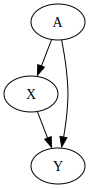

In [24]:
g = gr.Digraph()
g.edge("A", "X")
g.edge("A", "Y")
g.edge("X", "Y")
g

2. Functional assignments

In [25]:
a = np.random.randn(N_SAMPLES)
x = 2 * a + .7 * np.random.randn(N_SAMPLES)
y = 2 * a + 3 * x + .75 * x ** 2

3. Add constant, initialize and fit the model

In [33]:
X = sm.add_constant(np.stack([x, x**2, a]).T)
model = sm.OLS(y, X)
fitted_model = model.fit()
print(fitted_model.summary(xname=["const", "x", "x^2", "a"]))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.128e+32
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:49:38   Log-Likelihood:             1.5020e+05
No. Observations:                5000   AIC:                        -3.004e+05
Df Residuals:                    4996   BIC:                        -3.004e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.494e-16    3.8e-16     -1.972      0.0